In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import seaborn as sns


Format: JPEG
Size: (256, 256)
Mode: RGB


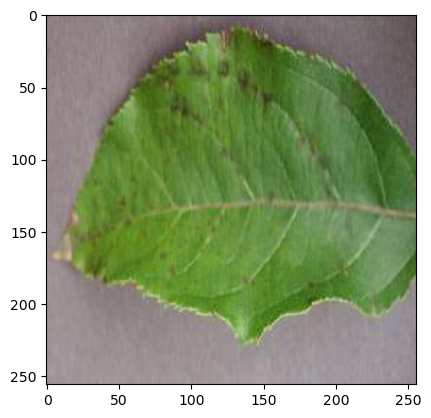

In [10]:
image_path = r"C:\Users\JAI BHORTAKE\Desktop\DL project\archive\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab"
sample_image = Image.open(os.path.join(image_path, '0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.JPG'))
image_array = np.array(sample_image)
print(f"Format: {sample_image.format}")
print(f"Size: {sample_image.size}")  # (width, height)
print(f"Mode: {sample_image.mode}")  # 'RGB', 'L' (grayscale), etc.
plt.imshow(sample_image)
plt.show()


In [12]:
print(image_array)

[[[  8   0   0]
  [  8   0   0]
  [  8   0   0]
  ...
  [  7   0   0]
  [  7   0   0]
  [  7   0   0]]

 [[140 128 128]
  [138 126 126]
  [138 126 126]
  ...
  [ 96  86  85]
  [ 95  85  84]
  [ 95  85  84]]

 [[137 125 125]
  [135 123 123]
  [136 124 124]
  ...
  [ 90  80  79]
  [ 89  79  78]
  [ 89  79  78]]

 ...

 [[162 150 154]
  [160 148 152]
  [158 146 150]
  ...
  [148 141 148]
  [146 139 146]
  [143 136 143]]

 [[162 150 154]
  [160 148 152]
  [159 147 151]
  ...
  [149 142 149]
  [147 140 147]
  [144 137 144]]

 [[161 149 153]
  [160 148 152]
  [160 148 152]
  ...
  [150 143 150]
  [148 141 148]
  [144 137 144]]]


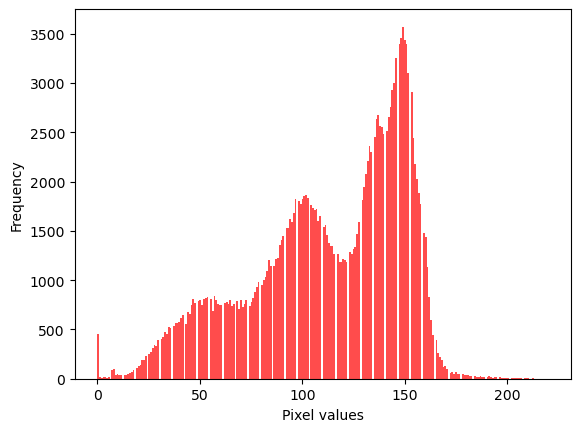

In [14]:
plt.hist(image_array.ravel(), bins=256, color='red', alpha=0.7)
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.show()

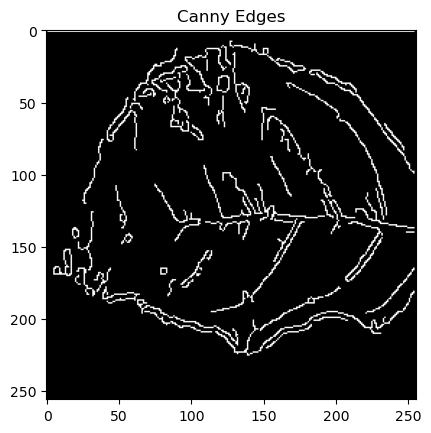

In [16]:
from skimage import feature, io, color
im_path = image_path + '/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.JPG'
image = io.imread(im_path)
gray_image = color.rgb2gray(image)

edges = feature.canny(gray_image, sigma=1.3)

plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.show()


In [32]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


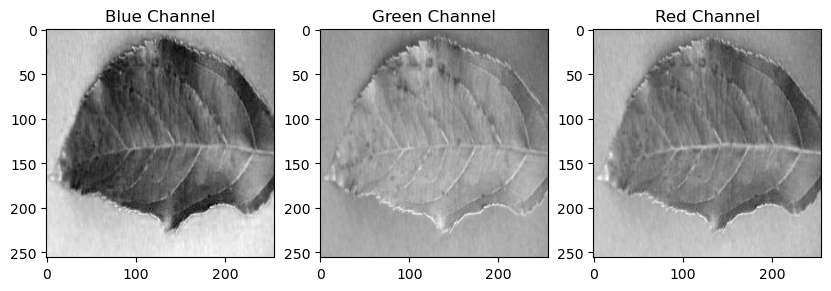

In [26]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(im_path)  # OpenCV loads images in BGR format
b, g, r = cv2.split(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Blue Channel')
plt.imshow(b, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Green Channel')
plt.imshow(g, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Red Channel')
plt.imshow(r, cmap='gray')
plt.show()


In [38]:
import os

data_dir = r"C:\Users\JAI BHORTAKE\Desktop\DL project\archive\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(data_dir, "train")
valid_dir = os.path.join(data_dir, "valid")
test_dir = r"C:\Users\JAI BHORTAKE\Desktop\DL project\archive\archive\test"

# List the diseases
diseases = os.listdir(train_dir)

# Remove .DS_Store if it exists
if '.DS_Store' in diseases:
    diseases.remove('.DS_Store')

print(diseases)


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [40]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [42]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
        #print(plant.split('___')[1])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [44]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of plants: 14
Number of diseases: 26


In [46]:
# Number of images for each disease
nums_train, nums_valid, nums_test = {},{},{}
for disease in diseases:
    nums_train[disease] = len(os.listdir(train_dir + '/' + disease))
    nums_valid[disease] = len(os.listdir(valid_dir + '/' + disease))
    nums_test[disease] = len(os.listdir(test_dir))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
img_per_class_valid = pd.DataFrame(nums_valid.values(), index=nums_valid.keys(), columns=["no. of images"])
img_per_class_test = pd.DataFrame(nums_test.values(), index=nums_test.keys(), columns=["no. of images"])

In [48]:
img_per_class_train.head()

,no. of images
Apple___Apple_scab,2017
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816


In [50]:
img_per_class_valid.head()

,no. of images
Apple___Apple_scab,504
Apple___Black_rot,497
Apple___Cedar_apple_rust,440
Apple___healthy,502
Blueberry___healthy,454


In [52]:
img_per_class_test.head()

,no. of images
Apple___Apple_scab,2
Apple___Black_rot,2
Apple___Cedar_apple_rust,2
Apple___healthy,2
Blueberry___healthy,2


Text(0.5, 1.0, 'Images per each class of plant disease for training')

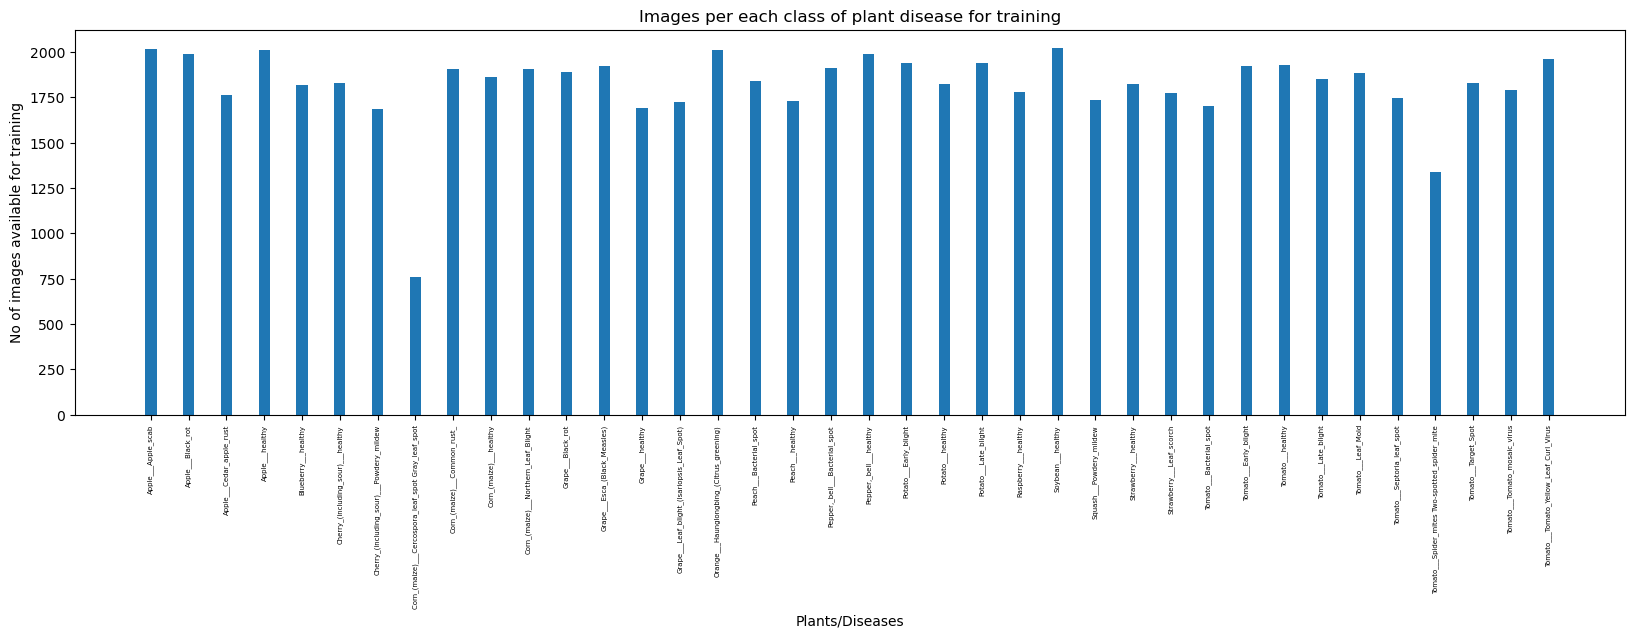

In [54]:
# plotting number of images available for training for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums_train.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available for training', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease for training')

Text(0.5, 1.0, 'Images per each class of plant disease for validating')

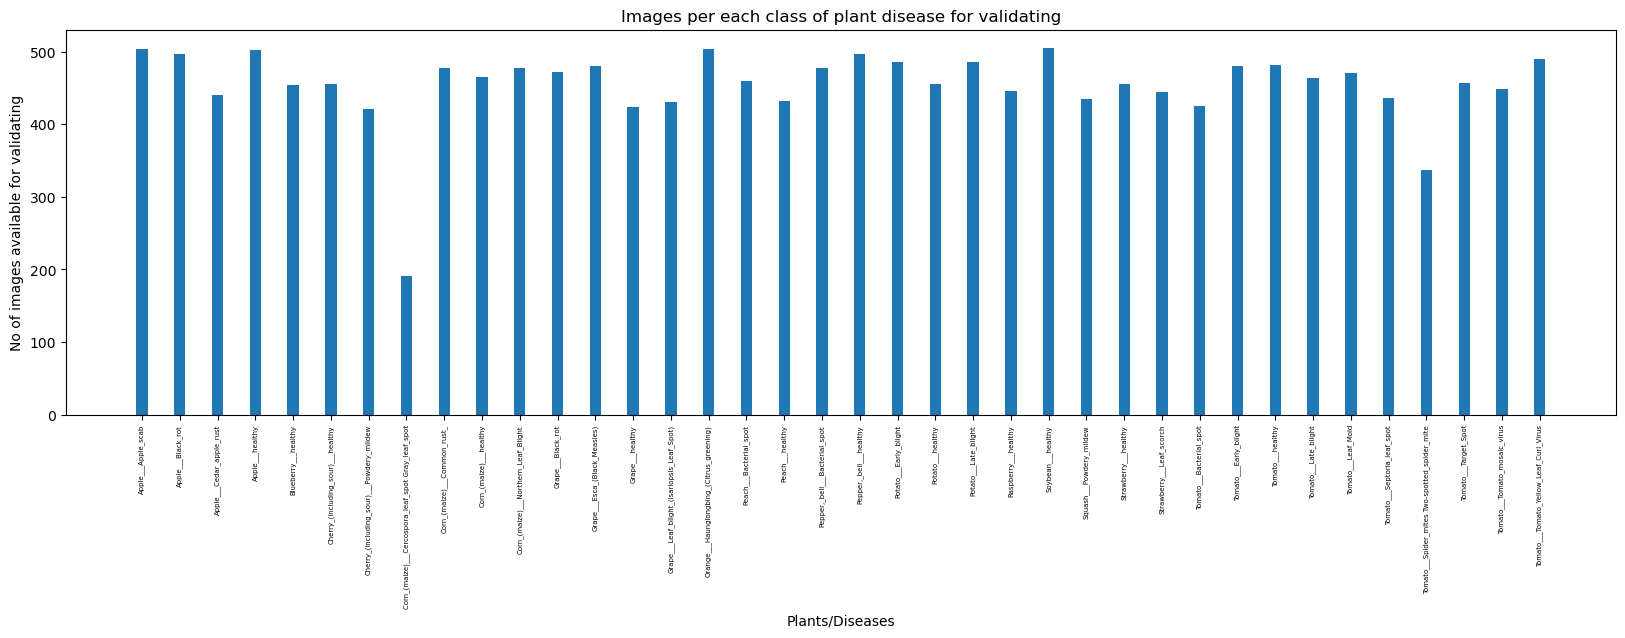

In [56]:
# plotting number of images available for validating for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums_valid.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available for validating', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease for validating')

Text(0.5, 1.0, 'Images per each class of plant disease for testing')

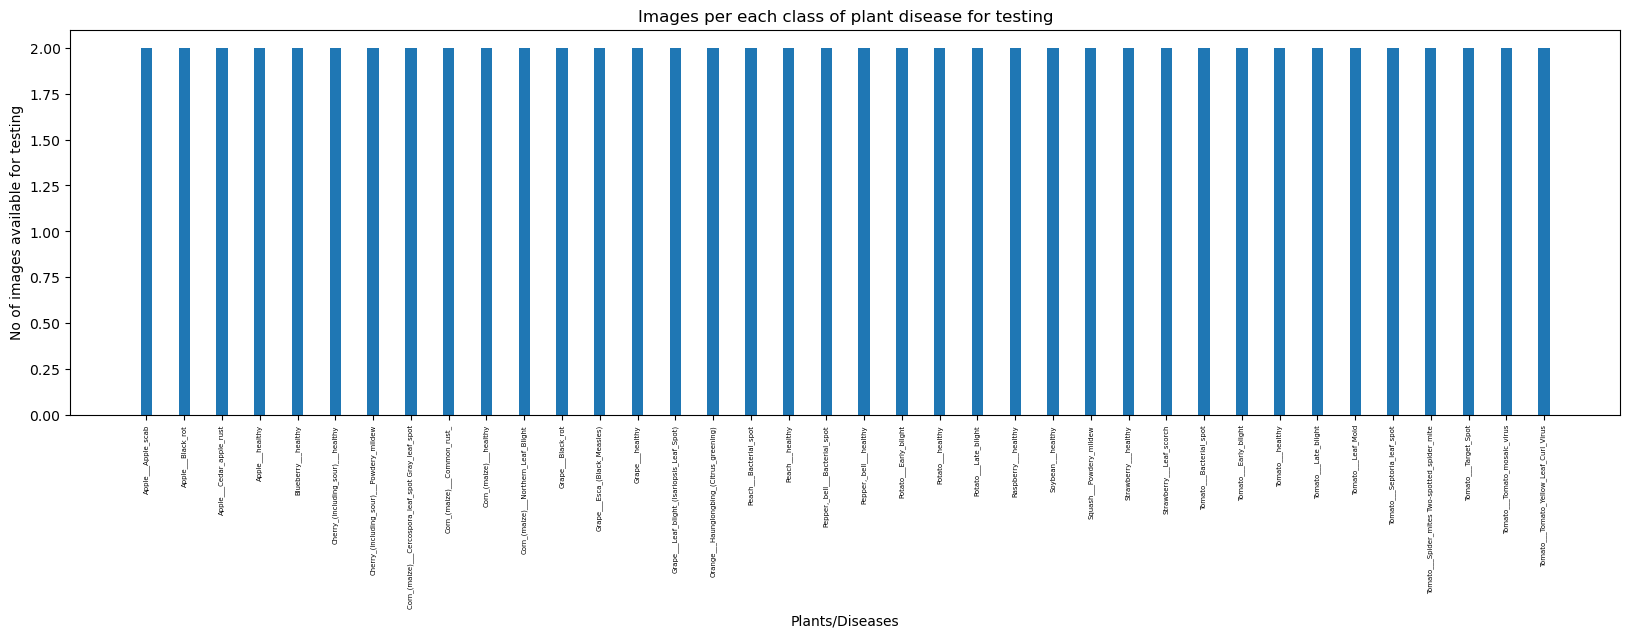

In [58]:
# plotting number of images available for testing for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums_test.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available for testing', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease for testing')

In [60]:
n_train,n_valid,n_test = 0,0,0
for value in nums_train.values():
    n_train += value
for value in nums_valid.values():
    n_valid += value
for value in nums_test.values():
    n_test += value
print(f"There are {n_train} images for training")
print(f"There are {n_valid} images for validating")
print(f"There are {n_test} images for testing")

There are 69009 images for training
There are 17255 images for validating
There are 76 images for testing


In [62]:
#checking null values
nulls = 0
for i in diseases:
    if(i == None or i == '0'):
        null+=1
print(f"Total number of null values are: {nulls} ")

Total number of null values are: 0 
